# Spotify Playlist Analysis with Song Recommendation

Author: Pharoah Evelyn

![Spotify Logo](./images/Spotify_Logo.jpeg)

In [1]:
# Standard Packages
import pandas as pd
import numpy as np
import glob

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Sklearn Modules
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,\
        AdaBoostClassifier, GradientBoostingClassifier

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score,\
        recall_score, accuracy_score, f1_score, log_loss, roc_curve,\
        auc, roc_auc_score, classification_report, plot_roc_curve, mean_absolute_error, mean_squared_error

from sklearn.metrics.pairwise import cosine_similarity, sigmoid_kernel
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, normalize, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor

# Progress bar
from tqdm import tqdm

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

First, let us import the data captured from our Collection using the Spotify API

In [2]:
# My playlist

my_playlist = pd.read_csv('data/my_playlist.csv')

Next, we can import all other playlists into a separated dataframe!

In [3]:
# Get CSV files list from a folder
path = './data'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes. 
# However, we must not include our target playlist as we need it for its own analysis
df_list = (pd.read_csv(file) for file in csv_files if file != 'my_playlist.csv')

# Concatenate all DataFrames
recommended_songs = pd.concat(df_list, ignore_index=True)

In [4]:
my_playlist.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,valence,key,energy,instrumentalness,liveness,loudness,speechiness,mode,tempo,time_signature
0,Getting There,Until The Quiet Comes,Flying Lotus,2012-10-01,109353,39,0.1490,0.180,0.100,1,0.719,0.00037,0.1310,-5.789,0.0993,1,163.801,4
1,Massage Situation,Reset EP,Flying Lotus,2007-10-01,167173,45,0.0108,0.603,0.403,3,0.606,0.00157,0.1080,-5.060,0.0688,0,93.060,4
2,Do The Astral Plane,Cosmogramma,Flying Lotus,2010-05-03,237920,44,0.0505,0.722,0.275,8,0.828,0.00000,0.1140,-3.227,0.1900,0,117.693,4
3,Camel,Los Angeles,Flying Lotus,2008-07-09,142893,34,0.0132,0.699,0.584,0,0.926,0.20000,0.3110,-6.142,0.2850,1,84.863,4
4,Putty Boy Strut,Until The Quiet Comes,Flying Lotus,2012-10-01,173687,32,0.1030,0.723,0.711,1,0.432,0.21800,0.0883,-7.891,0.4180,1,163.973,4


This dataframe encapsulates songs from the below libraries:

#### Playlists based on my recent listening History
![Spotify Logo](./images/Based_on_Recent_Listening.png)
<br>
#### Playlists curated based on what I like
![Spotify Logo](./images/More_of_What_You_Like.png)

In [5]:
recommended_songs.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,valence,key,energy,instrumentalness,liveness,loudness,speechiness,mode,tempo,time_signature
0,Awake (with Mahalia),Awake,Chiiild,2021-04-02,228626,0,0.315,0.504,0.665,5,0.579,0.054200,0.1100,-7.418,0.0423,0,83.973,4
1,Bound (with Blood Orange),Bound (with Blood Orange),Wet,2021-10-20,220332,48,0.172,0.629,0.270,10,0.515,0.133000,0.1440,-10.128,0.0785,0,191.706,4
2,dirty dancer,dirty dancer,Orion Sun,2022-02-08,169720,56,0.376,0.702,0.515,7,0.525,0.066700,0.1190,-5.028,0.0313,0,113.856,4
3,lived to love,lived to love,808vic,2021-09-22,255517,47,0.835,0.714,0.562,9,0.798,0.013300,0.0969,-10.997,0.0532,0,115.972,4
4,Intense,Blue Man,Cero Ismael,2021-02-18,141052,38,0.657,0.957,0.338,5,0.233,0.000036,0.1440,-11.533,0.1110,1,113.943,4


In [6]:
# Defining a function to create distribution plots of each relevant column

def vizualize_data(data):
    
    #Visualisation of Variability for each column in the dataframe

    fig,ax = plt.subplots(2,7,figsize=(20,10))

    sns.distplot(data['length'],bins=35,ax=ax[0,0])
    sns.distplot(data['popularity'],bins=35,ax=ax[0,1])
    sns.distplot(data['acousticness'],bins=35,ax=ax[0,2])
    sns.distplot(data['danceability'],bins=35,ax=ax[0,3])
    sns.distplot(data['valence'],bins=35,ax=ax[0,4])
    sns.distplot(data['key'],bins=35,ax=ax[0,5])
    sns.distplot(data['energy'],bins=35,ax=ax[0,6])
    sns.distplot(data['instrumentalness'],bins=35,ax=ax[1,0])
    sns.distplot(data['liveness'],bins=35,ax=ax[1,1])
    sns.distplot(data['loudness'],bins=35,ax=ax[1,2])
    sns.distplot(data['speechiness'],bins=35,ax=ax[1,3])
    sns.distplot(data['mode'],bins=35,ax=ax[1,4])
    sns.distplot(data['tempo'],bins=35,ax=ax[1,5])
    sns.distplot(data['time_signature'],bins=35,ax=ax[1,6])

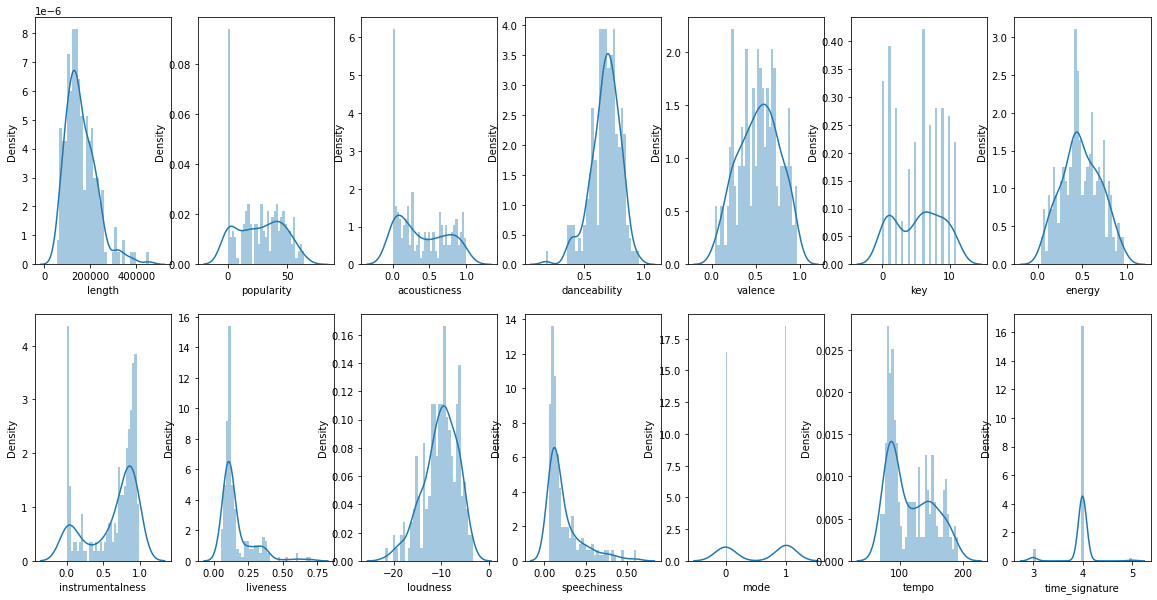

In [7]:
vizualize_data(my_playlist)

<AxesSubplot:>

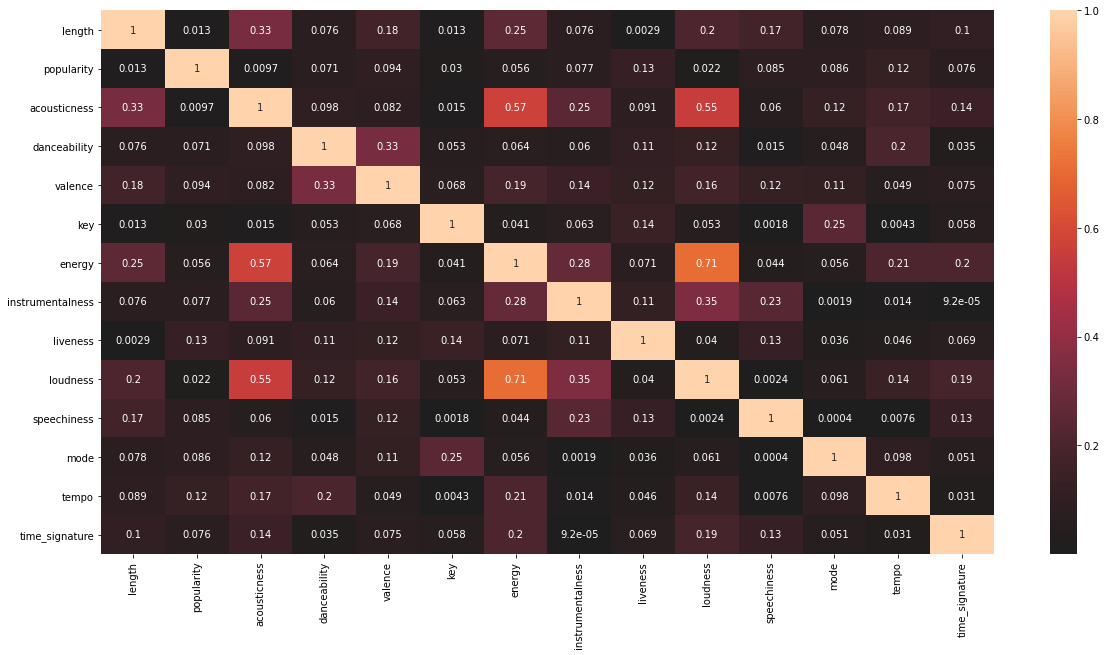

In [8]:
# My playlist
plt.figure(figsize=(20,10))
corr = my_playlist.corr().abs()
sns.heatmap(corr, center=0, annot=True)

#### Interpretation:
* This heatmap shows me that `energy`, `instrumentalness`, `acousticness`, & `loudness` have the most impact when it comes to the songs I have in my playlist
* Other key pairings I am noticing are `valence` & `danceability`, 
* Song `length`, `speechiness`, `popularity` & `time signature` appear to be the least relevant when it comes to impact of features in this playlist
    * With that said, I usually don't add songs with vocals (or verses) to this playlist. So I will keep speechiness as a key marker
* `energy` and `loudness` in particular have the highest multicollinearity seen on this chart. This make sense to me, as a song with high energy tends to have an increasing rhythmic complexity, whether melodically or in the background accompaniment with various instruments (as reflected in this chart as well

#### Investigating the statistics of the relevant columns

In [9]:
my_playlist[['acousticness', 'danceability', 'valence', 'key', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'mode', 'tempo']].describe()

,acousticness,danceability,valence,key,energy,instrumentalness,liveness,loudness,speechiness,mode,tempo
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.397338,0.679824,0.535355,5.362745,0.486715,0.619866,0.162888,-10.162534,0.117995,0.529412,116.384020
std,0.329015,0.120787,0.228999,3.551976,0.216834,0.341169,0.114808,3.606242,0.106193,0.500362,34.629592
min,0.000157,0.180000,0.038300,0.000000,0.032400,0.000000,0.049700,-21.776000,0.027800,0.000000,68.997000
25%,0.082100,0.623750,0.358750,2.000000,0.338000,0.352750,0.101000,-12.047250,0.048850,0.000000,86.199500
50%,0.314500,0.689500,0.545000,6.000000,0.461000,0.773500,0.116000,-9.672000,0.072750,1.000000,104.524000
75%,0.696000,0.755250,0.705000,8.000000,0.648250,0.891000,0.162750,-7.383500,0.147500,1.000000,146.038500
max,0.994000,0.964000,0.969000,11.000000,0.973000,0.981000,0.706000,-3.227000,0.556000,1.000000,192.110000


#### Interpretation
We can use the above information to capture common datapoints throughout the values found from my playlist.

For example, most songs in my playlist have an energy level between 0.34 to 0.65, with exceptions below and above
<br> 
Furthermore, most songs in my playlist are not very speechy, between 0.05 & 0.15, with exceptions below and above

### Combining the data 
Here, I am creating the identifier for all songs for the total data collected

Songs in my playlist will be marked 1, and others will be marked 0

In [10]:
my_playlist['target'] = '' # Creating an empty column
my_playlist['target'].replace('', 1, inplace=True) # Filling the new column with a number value

recommended_songs['target'] = ''
recommended_songs['target'].replace('', 0, inplace=True)

df_ = [my_playlist, recommended_songs] # All captured playlist songs, with their target association

df = pd.concat(df_)
df

,name,album,artist,release_date,length,popularity,acousticness,danceability,valence,key,energy,instrumentalness,liveness,loudness,speechiness,mode,tempo,time_signature,target
0,Getting There,Until The Quiet Comes,Flying Lotus,2012-10-01,109353,39,0.1490,0.180,0.100,1,0.719,0.000370,0.1310,-5.789,0.0993,1,163.801,4,1
1,Massage Situation,Reset EP,Flying Lotus,2007-10-01,167173,45,0.0108,0.603,0.403,3,0.606,0.001570,0.1080,-5.060,0.0688,0,93.060,4,1
2,Do The Astral Plane,Cosmogramma,Flying Lotus,2010-05-03,237920,44,0.0505,0.722,0.275,8,0.828,0.000000,0.1140,-3.227,0.1900,0,117.693,4,1
3,Camel,Los Angeles,Flying Lotus,2008-07-09,142893,34,0.0132,0.699,0.584,0,0.926,0.200000,0.3110,-6.142,0.2850,1,84.863,4,1
4,Putty Boy Strut,Until The Quiet Comes,Flying Lotus,2012-10-01,173687,32,0.1030,0.723,0.711,1,0.432,0.218000,0.0883,-7.891,0.4180,1,163.973,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4309,Pomegranate,"Lyrics to GO, Vol. 2",Kota the Friend,2021-01-18,109638,58,0.1360,0.637,0.373,2,0.489,0.000000,0.0954,-9.157,0.4440,1,79.175,4,0
4310,Raindrops (feat. Flo Milli),Raindrops (feat. Flo Milli),GoldLink,2021-06-16,155573,44,0.5060,0.868,0.559,9,0.563,0.000025,0.1500,-7.448,0.1720,0,139.971,4,0
4311,Why You in LA,Why You in LA,Keys Open Doors,2020-03-15,188839,44,0.0973,0.939,0.425,11,0.322,0.000092,0.0883,-9.463,0.3040,1,114.317,4,0
4312,Kimbo Slice,Kimbo Slice,Rexx Life Raj,2021-07-16,193109,55,0.1810,0.806,0.513,11,0.713,0.000000,0.0601,-6.792,0.1570,1,121.941,4,0


In [11]:
df.columns

Index(['name', 'album', 'artist', 'release_date', 'length', 'popularity',
       'acousticness', 'danceability', 'valence', 'key', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'mode',
       'tempo', 'time_signature', 'target'],
      dtype='object')

In [12]:
df.shape

(4518, 19)

In [13]:
df.drop_duplicates(subset=['name', 'album', 'artist', 'release_date', 'length', 'popularity',
       'acousticness', 'danceability', 'valence', 'key', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'mode',
       'tempo', 'time_signature'], keep='first', inplace=True)
df.shape

(3969, 19)

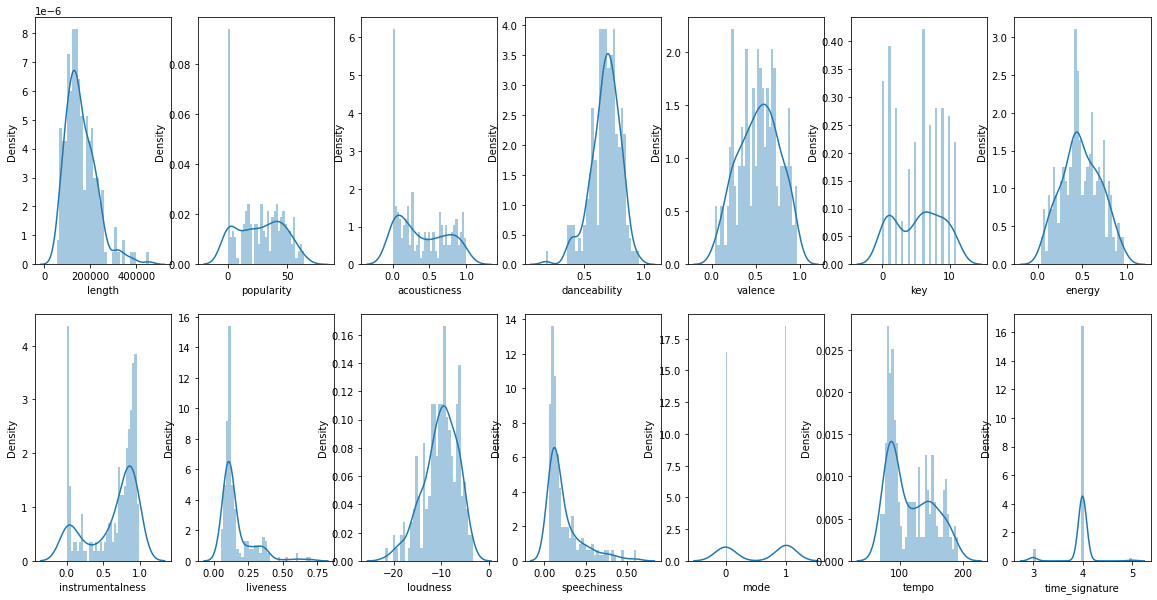

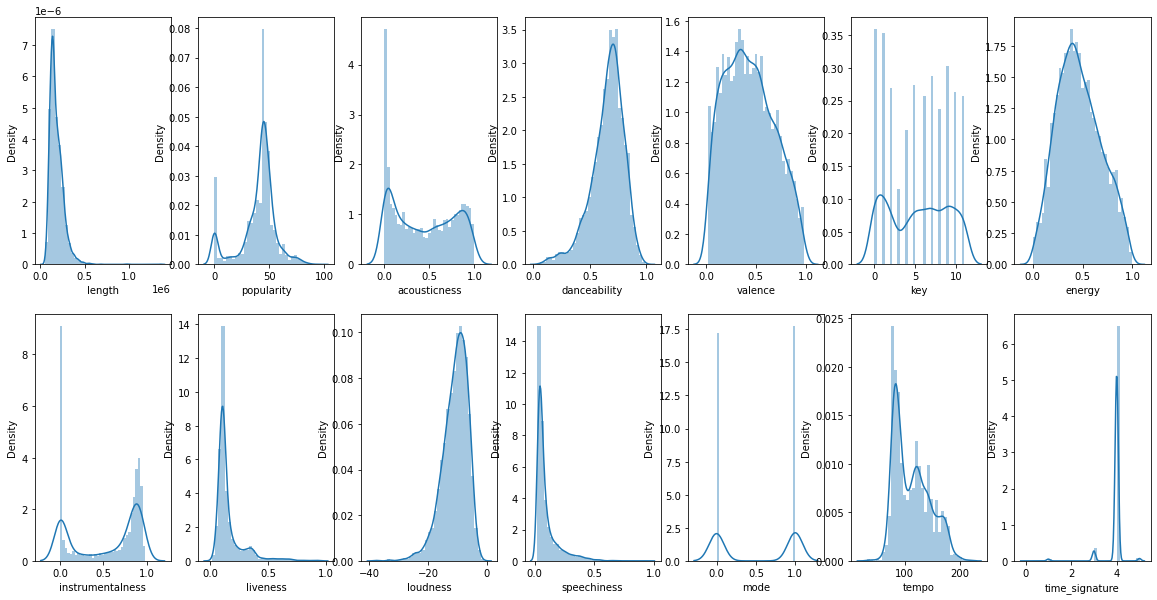

In [14]:
# Comparison of the distributions between my playlist, and all songs combined

vizualize_data(my_playlist) # First 2 rows
vizualize_data(df)c # Second 2 rows

#### Interpretation:
* Upon direct comparison of each feature in both datasets, we can see that they appear similar with their distributions, albeit with slight variations.
* There is a higher distribution with songs of lower valence in the recommended songs dataset compared to my playlist
* Popularity in my playlist also seems to be more varied in my playlist, whereas a noticeable selection of songs in the second dataset are popular

# Modeling
#### Feature Selection

In [15]:
feature_names = ['length', 'popularity', 'acousticness', 'danceability', 
                 'valence', 'key', 'energy', 'instrumentalness', 'liveness', 
                 'loudness', 'speechiness', 'mode','tempo', 'time_signature']

X, y = df[feature_names], df['target']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
                                X, y, test_size = 0.15, 
                                random_state =42)

In [17]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

#### Addressing Class Weights

In [18]:
# Discovering the total number of entries in are target training data
len(y_train)

3373

In [19]:
# Captures the ammount of occurences of each class in the training set

count = np.bincount(y_train)
print(count[0]) # Majority class
print(count[1]) # Minority class

3213
160


In [20]:
w0 = count[1]/len(y_train) # Assigning minority percentage
w1 = count[0]/len(y_train) # Assigning majority percentage

print(w0) # Adjusted weight for the minority class
print(w1) # Adjusted weight for the majority class

0.04743551734361103
0.9525644826563889


### Defining functions fo rmodel evaluation

In [21]:
metrics_df = []
def get_classification_report(y_test, y_pred):
    # This function returns a clean classification report in a pandas dataframe format
    from sklearn import metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    
    ##### reindex or change the order of rows
    df_classification_report.reindex(['0', '1', 'accuracy', 'weighted avg', 'macro avg'])
    
    #### Returning Capitalized column names
    df_classification_report.columns = df_classification_report.columns.str.capitalize()

    # Creates a 3-D dataframe
    metrics_df.append(df_classification_report.iloc[1:2, :])
    return df_classification_report


def model_results(model, X_test, y_test):
    # This function returns various metrics for our models that we run

    preds = model.predict(X_test)
    
    # A visual representation of a confusion Matrix
    plot_confusion_matrix(model, X_test, y_test);    
    plt.grid(False)
    
    # Prints the MAE & RMSE of a model
    print('Mean Absolute Error:', mean_absolute_error(y_test, preds)) 
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, preds)))

    # Plots the ROC Curve & Returns the AUC score
    plot_roc_curve(model, X_test, y_test);

## Logistic Regression

Mean Absolute Error: 0.2634228187919463
Root Mean Squared Error: 0.5132473271162221


,Precision,Recall,F1-score,Support
0,0.962529,0.744565,0.839632,552.000000
1,0.165680,0.636364,0.262911,44.000000
accuracy,0.736577,0.736577,0.736577,0.736577
macro avg,0.564105,0.690464,0.551272,596.000000
weighted avg,0.903702,0.736577,0.797056,596.000000


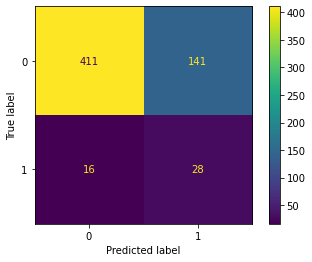

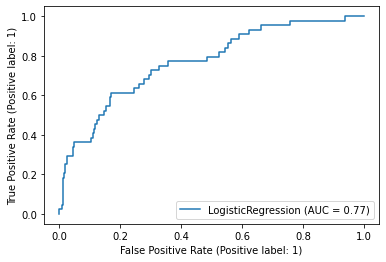

In [22]:
lr = LogisticRegression(class_weight={0: w0, 1: w1})
lr.fit(X_train_sc, y_train)

# Displays results of the model
model_results(lr, X_test_sc, y_test)

# Returns Classification Report
get_classification_report(y_test, lr.predict(X_test_sc))

## SVC

Mean Absolute Error: 0.2063758389261745
Root Mean Squared Error: 0.4542860760866158


,Precision,Recall,F1-score,Support
0,0.961290,0.809783,0.879056,552.000000
1,0.198473,0.590909,0.297143,44.000000
accuracy,0.793624,0.793624,0.793624,0.793624
macro avg,0.579882,0.700346,0.588099,596.000000
weighted avg,0.904975,0.793624,0.836096,596.000000


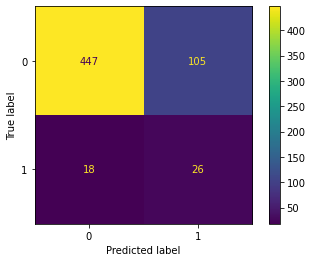

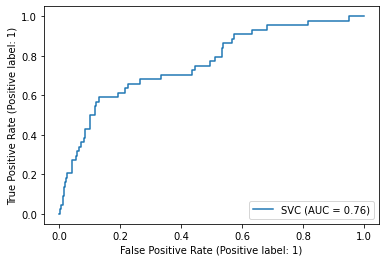

In [23]:
svm = SVC(class_weight={0: w0, 1: w1})
svm.fit(X_train_sc, y_train)

# Displays results of the model
model_results(svm, X_test_sc, y_test)

# Returns Classification Report
get_classification_report(y_test, svm.predict(X_test_sc))

## Decision Tree Classifier

Mean Absolute Error: 0.10067114093959731
Root Mean Squared Error: 0.3172871584851762


,Precision,Recall,F1-score,Support
0,0.934629,0.958333,0.946333,552.000000
1,0.233333,0.159091,0.189189,44.000000
accuracy,0.899329,0.899329,0.899329,0.899329
macro avg,0.583981,0.558712,0.567761,596.000000
weighted avg,0.882855,0.899329,0.890436,596.000000


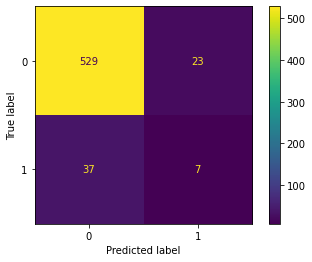

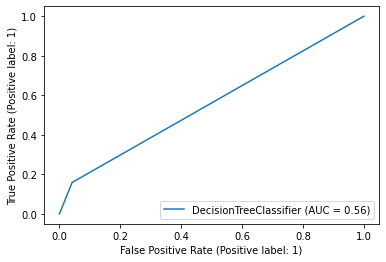

In [24]:
dtree = tree.DecisionTreeClassifier(class_weight={0: w0, 1: w1})
dtree.fit(X_train_sc, y_train)

# Displays results of the model
model_results(dtree, X_test_sc, y_test)

# Returns Classification Report
get_classification_report(y_test, dtree.predict(X_test_sc))

## Random Forests

Mean Absolute Error: 0.10570469798657718
Root Mean Squared Error: 0.3251225891668821


,Precision,Recall,F1-score,Support
0,0.960452,0.923913,0.941828,552.000000
1,0.353846,0.522727,0.422018,44.000000
accuracy,0.894295,0.894295,0.894295,0.894295
macro avg,0.657149,0.723320,0.681923,596.000000
weighted avg,0.915669,0.894295,0.903453,596.000000


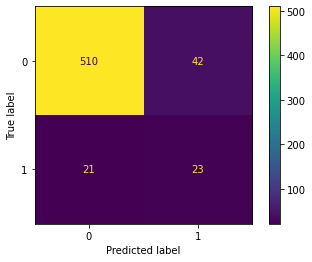

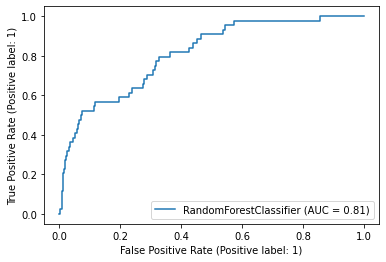

In [25]:
forest = RandomForestClassifier(class_weight={0: w0, 1: w1}, n_estimators=100, max_depth= 5)
forest.fit(X_train_sc, y_train)

# Displays results of the model
model_results(forest, X_test_sc, y_test)

# Returns Classification Report
get_classification_report(y_test, forest.predict(X_test_sc))

# Directly Comparing Classifiers

In [26]:
def classifier_performance(X_train_sc, X_test_sc, y_test):
    accuracy_df = []
    recall_df = []
    precision_df = []
    rocauc_df = []
    
    # Instantiate classifier objects
    classifier_list = [lr, svm, dtree, forest]
    
    # Display accuracy dataframe
    for classifier in classifier_list:
        preds = classifier.predict(X_test_sc)
        accuracy = accuracy_score(y_test, preds)   
        precision = precision_score(y_test, preds)
        recall = recall_score(y_test, preds)
        rocauc = roc_auc_score(y_test, preds)
        accuracy_df.append(accuracy*100)
        precision_df.append(precision*100)
        recall_df.append(recall*100)
        rocauc_df.append(rocauc*100)
    accuracy_df = pd.DataFrame(accuracy_df)
    precision_df = pd.DataFrame(precision_df)
    recall_df = pd.DataFrame(recall_df)
    rocauc_df = pd.DataFrame(rocauc_df)

    classifiers_key = ['Logistic Regression', 'Support Vector Machine', 
                       'Decision Tree', 'Random Forests']

    # Creating the datafram that displays results
    accuracy_df['Model']=classifiers_key
    precision_df['Model']=classifiers_key
    recall_df['Model']=classifiers_key
    rocauc_df['Model']=classifiers_key
    accuracy_df.rename(columns={0: 'Accuracy'}, inplace=True)
    precision_df.rename(columns={0: 'Precision'}, inplace=True)
    recall_df.rename(columns={0: 'Recall'}, inplace=True)
    rocauc_df.rename(columns={0: 'AUC'}, inplace=True)
    fin_metric_df = accuracy_df[['Model', 'Accuracy']]
    
    return fin_metric_df.merge(precision_df,on='Model').merge(recall_df,on='Model').merge(rocauc_df,on='Model')

In [27]:
classifier_performance(X_train_sc, X_test_sc, y_test)

,Model,Accuracy,Precision,Recall,AUC
0,Logistic Regression,73.657718,16.568047,63.636364,69.046443
1,Support Vector Machine,79.362416,19.847328,59.090909,70.034585
2,Decision Tree,89.932886,23.333333,15.909091,55.871212
3,Random Forests,89.429530,35.384615,52.272727,72.332016


#### Interpretation

Based on both the individual model outputs and the direct comparisons, it app
ears our SVM machine performed the best at predicting songs in my playlists, along with songs outside of the playlist.

I come to this conclusion because this classifier incorrectly predicts songs in my playlist less than logistic Regression, and retains a similar correct prediction rate as the logistic Regression

Decision Trees & Random Forests in this case, despite accounting for class imbalances, seem to rely on automatically predicting for 0: songs not being in my playlist

# Song Recommendation

For this analysis we will be comparing two different routes of content-based song recommendation.

One of which will uses the cosine similarity from a matrix
& The other uses neighbourhood collaborative filtering using the similarity metrics method

I am choosing this approach because the goal is to recommend specific songs that are similar to my favorite bingeworthy tunes.

In [28]:
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(df[feature_names])

### Cosine Similarity Recommender

In [29]:
# Create a pandas series with song titles as indices and indices as series values 
indices = pd.Series(df.index, index=df['name']).drop_duplicates()

# Create cosine similarity matrix based on given matrix
cosine = cosine_similarity(normalized_df)

def generate_recommendation(name, model_type=cosine):
    """
    Purpose: Function for song recommendations 
    Inputs: song title and type of similarity model
    Output: Pandas series of recommended songs
    """
    # Get song indices
    index=indices[name]
    # Get list of songs for given songs
    score=list(enumerate(model_type[indices[name]]))
    # Sort the most similar songs
    similarity_score = sorted(score,key = lambda x:x[1],reverse = True)
    # Select the top-10 recommend songs
    similarity_score = similarity_score[1:11]
    top_songs_index = [i[0] for i in similarity_score]
    # Top 10 recommende songs
    top_songs=df['name'].iloc[top_songs_index]
    print("Recommended Songs:")
    return top_songs

### Neighbourhood Collaborative Filtering, Similarity Metrics Recommender

In [30]:
def normalize_column(col):
    # Code Borrowed from Sunku Sowmya Sree via GitHub
    """
    col - column in the dataframe which needs to be normalized
    """
    max_d = df[col].max()
    min_d = df[col].min()
    df[col] = (df[col] - min_d)/(max_d - min_d)
    
# Normalize allnumerical columns so that min value is 0 and max value is 1
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = df.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(col)
    
# Perform Kmeans CLustering
km = KMeans(n_clusters=25)
pred = km.fit_predict(num)
df['pred'] = pred
df.drop(['release_date'],inplace=True,axis=1)
df.drop(['target'],inplace=True,axis=1)
normalize_column('pred')

# Song Recommender
class Song_Recommender():
    """
    Neighbourhood Based Collborative Filterng REcoomendation System using similarity Metrics
    Manhattan Distance is calculated for all songs and Recommend Songs that are similar to it based on any given song
    """
    def __init__(self, data):
        self.data_ = data
    
    # Function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, n_top):
        distances = []
        # Choosing the given song_name and dropping it from the data
        song = self.data_[(self.data_.name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(rem_data.values):
            dist = 0
            for col in np.arange(len(rem_data.columns)):
                # Indeces of non-numerical columns(id, release date, name, artists)
                if not col in [0,1,2]:
                    # Calculating the manhattan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        rem_data['distance'] = distances
        # Sorting our data to be ascending by 'distance' feature
        rem_data = rem_data.sort_values('distance')
        columns = ['name', 'artist']
        return rem_data[columns][:n_top]


# Instantiate the recommender class
recommender = Song_Recommender(df)

### Comparing Recommenders

In [31]:
generate_recommendation('5:32pm',cosine)

Recommended Songs:


2688              Tessin
2810          Hit Snooze
1500              Kalmar
1599                Nest
1192          Moving Day
2648            Aquarell
1569             Slanger
3746            Cruisin'
3687    pole mokotowskie
1546       Beside Myself
Name: name, dtype: object

In [32]:
recommender.get_recommendations('5:32pm', 10)

100%|██████████| 3968/3968 [00:00<00:00, 22064.66it/s]


,name,artist
798,Retro Jam,Blu Tone
1274,Coolin',Snazzy
1569,Slanger,pesto tree
1192,Moving Day,Paul Lovett
3877,intentions,shawn pink
1599,Nest,don C
1248,Sunset,Clifford
3907,home styling,slån
2532,Oasis,Glimlip
1006,Padron Peppers,Burrito Eats


In [33]:
generate_recommendation('Caliber',cosine)

Recommended Songs:


3647                    Liza waited
2643                   Sleepwalking
3744                   florida keys
822                        Crescent
1155                          Algud
3818    City Lights Spell Your Name
2672                   Portal Beach
974                       Head High
1417                       Memories
27               I'll Be Loving You
Name: name, dtype: object

In [34]:
recommender.get_recommendations('Caliber', 10)

100%|██████████| 3968/3968 [00:00<00:00, 31908.81it/s]


,name,artist
3647,Liza waited,Sail & Weep
3744,florida keys,Kolorama
1614,Jaunt,Lizlov
1484,Mellow Mood,Stereo Fear
1155,Algud,Konteks
3788,Drop In,Looi
822,Crescent,URCHN
3662,Raincoat,Ensidya
1374,Probably Yet Unfortunately,baegel
949,Lace Agate,Gemp


In [35]:
generate_recommendation('Space Cowboy',cosine)

Recommended Songs:


115           Samui Sunrise
573                 Keep On
2594           Sweet Sunset
851              va y viene
3606            As a friend
2451    no song without you
4144         Certain People
1109        Afternoon Break
2164          Out All Night
72                    sunny
Name: name, dtype: object

In [36]:
recommender.get_recommendations('Space Cowboy', 10)

100%|██████████| 3968/3968 [00:00<00:00, 32396.20it/s]


,name,artist
1109,Afternoon Break,Raouf Beats
2164,Out All Night,Ray Ben Rue
115,Samui Sunrise,Saib
903,Carrousel,Shin-Ski
2594,Sweet Sunset,Iassu
958,Pode Ser,Chancla
2576,blitzlys,damaa.beats
822,Crescent,URCHN
851,va y viene,Jiony
2526,Valencia,.multibeat


In [37]:
generate_recommendation('Sugar - Original Mix',cosine)

Recommended Songs:


117                 When You Call Me
187     How Long Have You Been Away?
2282                      THE BOTTOM
149                      Lost Myself
3185                        ketamine
3124                        The Look
4257                        Doin' It
4173                     Happy Music
4239         Give Life Back to Music
1970          19 - Josh Butler Remix
Name: name, dtype: object

In [38]:
recommender.get_recommendations('Sugar - Original Mix', 10)

100%|██████████| 3968/3968 [00:00<00:00, 32158.77it/s]


,name,artist
117,When You Call Me,STR4TA
3185,ketamine,siouxxie sixxsta
4173,Happy Music,Supershy
3124,The Look,Sports
1970,19 - Josh Butler Remix,Piem
1899,Zdarlight,Digitalism
187,How Long Have You Been Away?,kryptogram
4239,Give Life Back to Music,Daft Punk
149,Lost Myself,Eric Krasno
2282,THE BOTTOM,MICHELLE


In [39]:
generate_recommendation('Purple Night',cosine)

Recommended Songs:


1608                           ;(
3361                  Outlaw Star
3100                      Twinkle
1603                Love Me Right
172                       Bathtub
3198                    Resonance
3033    Me Myself and Dollar Hell
4232                 Time Runners
2580                     Lockdown
4138                  The Realest
Name: name, dtype: object

In [40]:
recommender.get_recommendations('Purple Night', 10)

100%|██████████| 3968/3968 [00:00<00:00, 32160.57it/s]


,name,artist
3100,Twinkle,Hether
243,Lonely Romance,CRi
883,Mo' Better Soul,Shuko
30,Dreams,Joakim Karud
1608,;(,ELEWAKA
172,Bathtub,Ballpoint
1603,Love Me Right,Loe Brezy
2580,Lockdown,Richie Rych
1501,Bliss,Cap Kendricks
3217,4:30,Danger


In [41]:
generate_recommendation('Don\'t Give Up',cosine)

Recommended Songs:


164                                Say Yes
3824                             Slow Gaze
45                                 Gardens
1071                                olvido
3159    Asdikte Akal - Yugen Blakrok Remix
4042                       Watch Your Back
990                 when i ate a persimmon
1013                        Before the Sun
129                                Night 1
288                      Way Ur Touchin Me
Name: name, dtype: object

In [42]:
recommender.get_recommendations('Don\'t Give Up', 10)

100%|██████████| 3968/3968 [00:00<00:00, 31634.61it/s]


,name,artist
129,Night 1,Ta-ku
45,Gardens,Various Artists
3824,Slow Gaze,SASAF
4193,Baby - Short Version,Girls of the Internet
990,when i ate a persimmon,AOI
3159,Asdikte Akal - Yugen Blakrok Remix,Mdou Moctar
1992,Cruel Summer - Part I (feat. Zampera & Muttofunk),North of Loreto
1484,Mellow Mood,Stereo Fear
2542,Warm Flicker,rocomoco
1098,Dad's song,c e c e l i e


# Conclusions
Though these two different recommenders return different results, there appears to be an agreement with some songs in their results.

Due to the songs having similar features throughout all variables, tracks that appear in both recommenders must be reliable matches to the music searched and might be a likely lead to be added to my playlist.